### House Price

In [1]:
# import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import Datasets

house_train_csv = pd.read_csv(r'C:\Users\BOTS\Desktop\MachineLearning\SupervisedLearning\Regression\House-Price-Prediction\train.csv')

house_test_csv = pd.read_csv(r'C:\Users\BOTS\Desktop\MachineLearning\SupervisedLearning\Regression\House-Price-Prediction\test.csv')



In [3]:
house_test_csv.shape

(1459, 80)

In [4]:
house_train_csv.shape

(1460, 81)

In [5]:
train_df = pd.DataFrame(house_train_csv)
train_df.set_index('Id')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
test_df = pd.DataFrame(house_test_csv)

test_df.set_index('Id')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [7]:
y_train = train_df['SalePrice']

In [8]:
train_df1 = train_df.drop(columns='SalePrice')


In [9]:
df = pd.concat([train_df1, test_df], axis='rows')

In [10]:
df.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [11]:
# -------------------> tr_df = df.iloc[0:1460,::]

# ------------------ > test_df = df.iloc[1460::, ::]

In [12]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [13]:
# Data Cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [14]:
# Checking for presense of missing values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [15]:
#visualize all columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
#Column Drop based on low influence in predicting the price of a house intuition
first_drop = ['LotArea', 'LotShape', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Electrical','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MasVnrArea', 'LowQualFinSF', 'CentralAir']

df1 = df.drop(columns=first_drop)

second_drop  = ['Alley','LotFrontage', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

df2 = df1.drop(columns=second_drop)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   Street         2919 non-null   object 
 4   LandContour    2919 non-null   object 
 5   Utilities      2917 non-null   object 
 6   Neighborhood   2919 non-null   object 
 7   BldgType       2919 non-null   object 
 8   HouseStyle     2919 non-null   object 
 9   OverallQual    2919 non-null   int64  
 10  OverallCond    2919 non-null   int64  
 11  YearBuilt      2919 non-null   int64  
 12  YearRemodAdd   2919 non-null   int64  
 13  Exterior1st    2918 non-null   object 
 14  Exterior2nd    2918 non-null   object 
 15  ExterQual      2919 non-null   object 
 16  ExterCond      2919 non-null   object 
 17  Foundation     2919 non-null   object 
 18  BsmtQual

In [19]:
df2.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
Street            0
LandContour       0
Utilities         2
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
Exterior1st       1
Exterior2nd       1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
PavedDrive        0
MoSold            0
YrSold            0
SaleType          1
SaleCondition     0
dtype: int64

In [20]:
# function to handle missing values

def column_clean(df, mode, *columns):
    """
    Handling missing value
    
    Args:
      df (pandas dataframe): Shape (m,n) dataset 
      mode (string): method of cleaning the dataset    
      column (list):  columns with which the data cleaning should be applied     
      
    Returns:
      dataframe (pandas dataframe):  new dataframe
    """  

    col_list= []
    
    for column in columns:
        col_list.append(column)
        
    
    
    if mode == 'Drop column':
        
        df = df.drop(columns=col_list, axis=1)
            
    elif mode == 'Drop Null':
        df = df.dropna(subset=col_list)
            
    elif mode == 'Fill mean':
        df[col].fillna(df[col].mean(), inplace=True)
            
    else:
        for col in columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
            
            
    return df 



In [21]:
df3 = column_clean(df2, 'Mode', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType' )
df3.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LandContour      0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
PavedDrive       0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [22]:
df3.describe()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,6.089072,5.564577,1971.312778,1984.264474,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,6.213087,2007.792737
std,842.787043,42.517628,1.409947,1.113131,30.291442,20.894344,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,2.714762,1.314964
min,1.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,6.000000,5.000000,1973.000000,1993.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,6.000000,2008.000000
75%,2189.500000,70.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,8.000000,2009.000000
max,2919.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,12.000000,2010.000000


In [23]:
numeric_col = ['MSSubClass','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea','MoSold','YrSold']  

numeric_col = df3[numeric_col]

numeric_col.shape

(2919, 13)

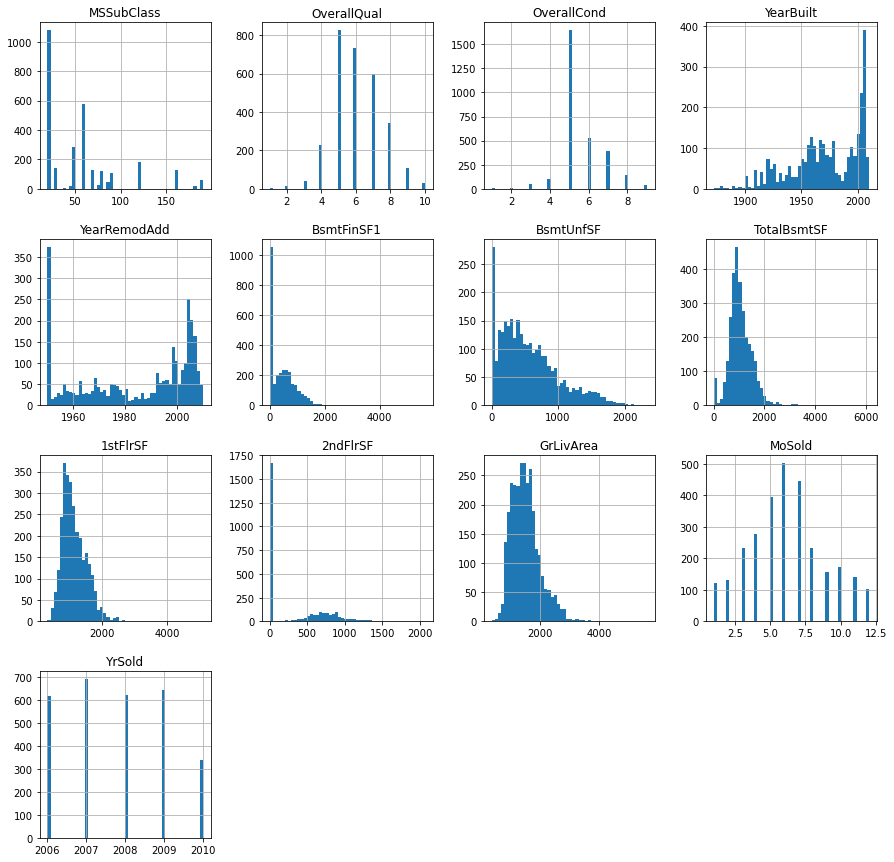

In [24]:
numeric_col.hist(bins=50, figsize=(15,15))
plt.show()

In [25]:
# Feature Engineering to improve the correlation between the features

numeric_col1 = numeric_col.copy()

numeric_col1['Engr_OverallYear'] = numeric_col1['YearRemodAdd'] + numeric_col1['YearBuilt']
numeric_col1['Engr_1st&2ndFirSF'] = numeric_col1['1stFlrSF'] + numeric_col1['2ndFlrSF']


In [26]:
drop_features = ['YearRemodAdd', 'YearBuilt', '1stFlrSF', '2ndFlrSF']

numeric_col2 = numeric_col1.drop(columns=drop_features)

numeric_col2.shape

(2919, 11)

In [27]:
numeric_columns = list(numeric_col)

In [28]:
category_columns = df3.drop(columns=numeric_columns)

In [29]:
category_columns.shape

(2919, 34)

In [30]:
category_columns['Engr_bath'] = category_columns['FullBath'] + category_columns['HalfBath']*0.5 + category_columns['BsmtFullBath']


In [31]:
bath = ['FullBath', 'HalfBath', 'BsmtFullBath']

category_columns1 = category_columns.drop(columns=bath)

In [32]:
category_columns1.shape

(2919, 32)

In [33]:
category_column2 = category_columns1.copy()
category_column2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   Street         2919 non-null   object 
 3   LandContour    2919 non-null   object 
 4   Utilities      2919 non-null   object 
 5   Neighborhood   2919 non-null   object 
 6   BldgType       2919 non-null   object 
 7   HouseStyle     2919 non-null   object 
 8   Exterior1st    2919 non-null   object 
 9   Exterior2nd    2919 non-null   object 
 10  ExterQual      2919 non-null   object 
 11  ExterCond      2919 non-null   object 
 12  Foundation     2919 non-null   object 
 13  BsmtQual       2919 non-null   object 
 14  BsmtCond       2919 non-null   object 
 15  BsmtExposure   2919 non-null   object 
 16  BsmtFinType1   2919 non-null   object 
 17  BsmtFinType2   2919 non-null   object 
 18  BsmtFinS

In [34]:
# Exploring values in each categorical columns

category_column2['MSZoning'].unique()
category_column2['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [35]:
category_column2['Street'].unique()
category_column2['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [36]:
category_column2['LandContour'].unique()
category_column2['LandContour'].value_counts()


Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [37]:
category_column2['Utilities'].unique()
category_column2['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
category_column2['Neighborhood'].unique()
category_column2['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [39]:
category_column2['BldgType'].unique()
category_column2['BldgType'].value_counts()

# Map categorical features to a numeric class

bldgType_map = {'1Fam': 1, 
               '2fmCon':2, 
               'TwnhsE': 4, 
               'Duplex': 3, 
               'Twnhs':5
               }

category_column2['BldgType_MAP'] = category_column2['BldgType'].map(bldgType_map)


In [40]:
category_column2['HouseStyle'].unique()

#category_column2['HouseStyle'].value_counts()
housestyle_map = {'2Story':4,
                 '1Story':1, 
                 '1.5Fin': 3,
                 '1.5Unf': 2, 
                 '2.5Fin': 6,
                 '2.5Unf':5,
                 'SFoyer':7,
                 'SLvl':8}

category_column2['housestyle_MAP'] = category_column2['HouseStyle'].map(housestyle_map)


In [41]:
category_column2['ExterQual'].unique()
category_column2['ExterQual'].value_counts()


exterqual_map = {'Ex':5,
                'Gd':4,
                'TA':3,
                'Fa':2}

category_column2['ExterQual_map'] = category_column2['ExterQual'].map(exterqual_map)


In [42]:
category_column2['ExterCond'].unique()
category_column2['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [43]:
category_column2['Foundation'].unique()
category_column2['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [44]:
category_column2['BsmtQual'].unique()
category_column2['BsmtQual'].value_counts()


bsmtqual_map = {'Ex':5,
               'Gd':4,
               'TA':3,
               'Fa':2}

category_column2['BsmtQual_map'] = category_column2['BsmtQual'].map(bsmtqual_map)

In [45]:
category_column2['BsmtCond'].unique()
category_column2['BsmtCond'].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [46]:
category_column2['BsmtExposure'].unique()
category_column2['BsmtExposure'].value_counts()


bsmtexposure_map = {'Gd':4,
                   'Av':3,
                   'Mn':2,
                   'No':1}

category_column2['BsmtExposure_map'] = category_column2['BsmtExposure'].map(bsmtexposure_map)


In [47]:
category_column2['BsmtFinType1'].unique()
category_column2['BsmtFinType1'].value_counts()


bsmtfintype1_map = {'GLQ':6,
                   'ALQ':5,
                   'BLQ':4,
                   'Rec':3,
                   'LwQ':2,
                   'Unf':1
                   }

category_column2['BsmtFinType1_map'] = category_column2['BsmtFinType1'].map(bsmtfintype1_map)

In [48]:
category_column2['BsmtFinType2'].unique()
category_column2['BsmtFinType2'].value_counts()

Unf    2573
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [49]:
category_column2['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [50]:
category_column2['HeatingQC'].value_counts()

heatingqc_map = {'Ex':5,
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

category_column2['HeatingQC_map'] = category_column2['HeatingQC'].map(heatingqc_map)


In [51]:
category_column2['BsmtHalfBath'].value_counts()


0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [52]:

category_column2['KitchenQual'].value_counts()


kitchenqual_map = {'Ex':5,
                  'Gd':4,
                  'TA':3,
                  'Fa':2}

category_column2['KitchenQual_map'] = category_column2['KitchenQual'].map(kitchenqual_map)

In [53]:
category_column2['Functional'].value_counts()


functional_map = {'Typ':7,
                 'Min1':6,
                 'Min2':5,
                 'Mod':4,
                 'Maj1':3,
                 'Maj2':2,
                 'Sev':1}

category_column2['Functional_map'] = category_column2['Functional'].map(functional_map)

In [54]:
category_column2['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [55]:

#===============================================================================================================================

# ----------- Street ==> Not a good feature to use for prediction, having class imbalance of 1407 to 6.(Drop column)

# ----------- LandContour ==>  Not a good feature to use for prediction, having class imbalance.(Drop column)

# ----------- Utilities ==>  Not a good feature to use for prediction, having class imbalance.(Drop column)

# ---------- ExterCond ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtCond ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtFinType2 ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- Heating ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------- BsmtHalfBath ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ------ KitchenAbvGr ==> Not a good feature to use for prediction, having class imbalance.(Drop column)

# ----- PavedDrive ==> Not a good feature to use for prediction, having class imbalance.(Drop column)


# ==============================================================================================================================


# ----------- Neighborhood ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) --- ONEHOT ENCODING 2ND STAGE 

# ---------- Exterior1st ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ---------- Exterior2nd ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE 

# --------- Foundation ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ----- SaleType ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ------ SaleCondition ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) ONEHOT ENCODING 2ND STAGE

# ----------- MS-Zoning ==> Let the model decide 


# ==============================================================================================================================


# ---------- BldgType ==> Bad class representation but an important feature to use for prediction, having class imbalance.(Manual mapping)

# ---------- HouseStyle ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ---------- ExterQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)
 
# --------- BsmtQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BsmtExposure ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BsmtFinType1 ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)


# ------- HeatingQC ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)

# ------- BedroomAbvGr ==> Good distribution of class, ALREADY DISTRIBUTED

# ----- KitchenQual ==> Good distribution of class,     (GOOD FOR MODEL TRAINING) (Manual mapping)


# ==========================================================================================================================

# ------- BsmtFinSF2 ************ ***************** ****************** ************************

# ----- TotRmsAbvGrd ==> Good distribution of class, ALREADY DISTRIBUTED

# ----- Functional ==> * Underpresented but would be checked again.

# ----- Fireplaces ==> Good distribution of class, ALREADY DISTRIBUTED

# ------ Engr_bath ==> Good distribution of class, ALREADY DISTRIBUTED


In [56]:
category_column2.shape

(2919, 41)

In [57]:
category_column2.head(2)

,Id,MSZoning,Street,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,PavedDrive,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,1,RL,Pave,Lvl,AllPub,CollgCr,1Fam,2Story,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,0.0,GasA,Ex,0.0,3,1,Gd,8,Typ,0,Y,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,2,RL,Pave,Lvl,AllPub,Veenker,1Fam,1Story,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,0.0,GasA,Ex,1.0,3,1,TA,6,Typ,1,Y,WD,Normal,2.0,1,1,3,4,4,5,5,3,7


In [58]:
second_drop = ['Street','LandContour', 'Utilities', 'ExterCond','BsmtCond', 'BsmtFinType2', 'Heating', 'BsmtHalfBath', 'KitchenAbvGr', 'PavedDrive'] 

In [59]:
category_column3 = category_column2.drop(columns=second_drop)

In [60]:
category_column3.shape

(2919, 31)

In [61]:
unmapped_cat = ['BldgType', 'HouseStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',  'KitchenQual']

category_column4 = category_column3.drop(columns=unmapped_cat)

In [62]:
category_column4.shape

(2919, 23)

In [63]:
collide_df = pd.concat([numeric_col2, category_column4], axis=1)

In [64]:
collide_df.shape

(2919, 34)

In [65]:
collide_df.head(2)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706.0,150.0,856.0,1710,2,2008,4006,1710,1,RL,CollgCr,VinylSd,VinylSd,PConc,0.0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978.0,284.0,1262.0,1262,5,2007,3952,1262,2,RL,Veenker,MetalSd,MetalSd,CBlock,0.0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7


In [66]:
X_train = collide_df.iloc[0:1460,::]

In [67]:
X_test = collide_df.iloc[1460::, ::]

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

label_MSZoning = le.fit(X_train['MSZoning'])


In [69]:

X_train['MSZoning'] = label_MSZoning.transform(X_train['MSZoning'])

C:\Users\BOTS\AppData\Local\Temp/ipykernel_3136/1974040134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['MSZoning'] = label_MSZoning.transform(X_train['MSZoning'])


In [70]:


X_train.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,60,7,5,706.0,150.0,856.0,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,VinylSd,PConc,0.0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7
1,20,6,8,978.0,284.0,1262.0,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,MetalSd,CBlock,0.0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7
2,60,7,5,486.0,434.0,920.0,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,VinylSd,PConc,0.0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7
3,70,7,5,216.0,540.0,756.0,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,Wd Shng,BrkTil,0.0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7
4,60,8,5,655.0,490.0,1145.0,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,VinylSd,PConc,0.0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7


In [71]:
ohe = OneHotEncoder()

one_hot_neighbor = ohe.fit_transform(X_train[['Neighborhood']]).toarray()

In [72]:
dummies_Neighborhood = pd.get_dummies(X_train['Neighborhood'], prefix='neighbor')

dummies_Neighborhood.shape

(1460, 25)

In [73]:
dummies_Exterior1st = pd.get_dummies(X_train['Exterior1st'], prefix='Exterior1st')

dummies_Exterior1st.shape

(1460, 15)

In [74]:
dummies_Foundation = pd.get_dummies(X_train['Foundation'], prefix='Foundation')

In [75]:
dummies_Functional = pd.get_dummies(X_train['Functional'], prefix='Functional')
dummies_Functional.shape

(1460, 7)

In [76]:
dummies_SaleType = pd.get_dummies(X_train['SaleType'], prefix='SaleType')

dummies_SaleType.shape

(1460, 9)

In [77]:
dummies_SaleCondition = pd.get_dummies(X_train['SaleCondition'], prefix='SaleCondition')
dummies_SaleCondition.shape

(1460, 6)

In [78]:
X_train_dummies = pd.concat([X_train, dummies_Neighborhood, dummies_Exterior1st, dummies_Foundation, dummies_SaleType, dummies_SaleCondition], axis=1)


In [79]:
X_train_dummies1 = X_train_dummies.drop(columns=['Exterior2nd'])

X_train_dummies1.head(5)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,706.0,150.0,856.0,1710,2,2008,4006,1710,1,3,CollgCr,VinylSd,PConc,0.0,3,8,Typ,0,WD,Normal,3.5,1,4,4,4,1,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,6,8,978.0,284.0,1262.0,1262,5,2007,3952,1262,2,3,Veenker,MetalSd,CBlock,0.0,3,6,Typ,1,WD,Normal,2.0,1,1,3,4,4,5,5,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,7,5,486.0,434.0,920.0,1786,9,2008,4003,1786,3,3,CollgCr,VinylSd,PConc,0.0,3,6,Typ,1,WD,Normal,3.5,1,4,4,4,2,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,7,5,216.0,540.0,756.0,1717,2,2006,3885,1717,4,3,Crawfor,Wd Sdng,BrkTil,0.0,3,7,Typ,1,WD,Abnorml,2.0,1,4,3,3,1,5,4,4,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,8,5,655.0,490.0,1145.0,2198,12,2008,4000,2198,5,3,NoRidge,VinylSd,PConc,0.0,4,9,Typ,1,WD,Normal,3.5,1,4,4,4,3,6,5,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [80]:
X_train_dummies2 = X_train_dummies1.drop(columns=['Neighborhood','Exterior1st', 'Foundation', 'SaleType', 'SaleCondition', 'Functional'])


In [81]:
label_MSZoning_test = le.fit(X_test['MSZoning'])


In [82]:

X_test['MSZoning'] = label_MSZoning_test.transform(X_test['MSZoning'])

C:\Users\BOTS\AppData\Local\Temp/ipykernel_3136/930289832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['MSZoning'] = label_MSZoning_test.transform(X_test['MSZoning'])


In [83]:

X_test.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Exterior2nd,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map
0,20,5,6,468.0,270.0,882.0,896,6,2010,3922,896,1461,2,NAmes,VinylSd,VinylSd,CBlock,144.0,2,5,Typ,0,WD,Normal,1.0,1,1,3,3,1,3,3,3,7
1,20,6,6,923.0,406.0,1329.0,1329,6,2010,3916,1329,1462,3,NAmes,Wd Sdng,Wd Sdng,CBlock,0.0,3,6,Typ,0,WD,Normal,1.5,1,1,3,3,1,5,3,4,7
2,60,5,5,791.0,137.0,928.0,1629,3,2010,3995,1629,1463,3,Gilbert,VinylSd,VinylSd,PConc,0.0,3,6,Typ,1,WD,Normal,2.5,1,4,3,4,1,6,4,3,7
3,60,6,6,602.0,324.0,926.0,1604,6,2010,3996,1604,1464,3,Gilbert,VinylSd,VinylSd,PConc,0.0,3,7,Typ,1,WD,Normal,2.5,1,4,3,3,1,6,5,4,7
4,120,8,5,263.0,1017.0,1280.0,1280,1,2010,3984,1280,1465,3,StoneBr,HdBoard,HdBoard,PConc,0.0,2,5,Typ,0,WD,Normal,2.0,4,1,4,4,1,5,5,4,7


In [84]:
dummies_Neighborhood_test = pd.get_dummies(X_test['Neighborhood'], prefix='neighbor')

dummies_Neighborhood_test.shape

(1459, 25)

In [85]:
dummies_Exterior1st_test = pd.get_dummies(X_test['Exterior1st'], prefix='Exterior1st')

dummies_Exterior1st_test.shape

(1459, 13)

In [86]:
dummies_Foundation_test = pd.get_dummies(X_test['Foundation'], prefix='Foundation')

In [87]:
dummies_Functional_test = pd.get_dummies(X_test['Functional'], prefix='Functional')
dummies_Functional_test.shape

(1459, 7)

In [88]:
dummies_SaleType_test = pd.get_dummies(X_test['SaleType'], prefix='SaleType')

dummies_SaleType_test.shape

(1459, 9)

In [89]:
dummies_SaleCondition_test = pd.get_dummies(X_test['SaleCondition'], prefix='SaleCondition')
dummies_SaleCondition_test.shape

(1459, 6)

In [90]:
X_test_dummies = pd.concat([X_test, dummies_Neighborhood_test, dummies_Exterior1st_test, dummies_Foundation_test, dummies_SaleType_test, dummies_SaleCondition_test], axis=1)


In [91]:
X_test_dummies1 = X_test_dummies.drop(columns=['Exterior2nd'])

X_test_dummies1.head(5)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,Neighborhood,Exterior1st,Foundation,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,SaleType,SaleCondition,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,5,6,468.0,270.0,882.0,896,6,2010,3922,896,1461,2,NAmes,VinylSd,CBlock,144.0,2,5,Typ,0,WD,Normal,1.0,1,1,3,3,1,3,3,3,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,6,6,923.0,406.0,1329.0,1329,6,2010,3916,1329,1462,3,NAmes,Wd Sdng,CBlock,0.0,3,6,Typ,0,WD,Normal,1.5,1,1,3,3,1,5,3,4,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,5,5,791.0,137.0,928.0,1629,3,2010,3995,1629,1463,3,Gilbert,VinylSd,PConc,0.0,3,6,Typ,1,WD,Normal,2.5,1,4,3,4,1,6,4,3,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,6,6,602.0,324.0,926.0,1604,6,2010,3996,1604,1464,3,Gilbert,VinylSd,PConc,0.0,3,7,Typ,1,WD,Normal,2.5,1,4,3,3,1,6,5,4,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,120,8,5,263.0,1017.0,1280.0,1280,1,2010,3984,1280,1465,3,StoneBr,HdBoard,PConc,0.0,2,5,Typ,0,WD,Normal,2.0,4,1,4,4,1,5,5,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [92]:
X_test_dummies2 = X_test_dummies1.drop(columns=['Neighborhood','Exterior1st', 'Foundation', 'SaleType', 'SaleCondition', 'Functional'])


In [93]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression()

linear_model = ls.fit(X_train_dummies2, y_train)

In [94]:
X_train_dummies2.head(3)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,706.0,150.0,856.0,1710,2,2008,4006,1710,1,3,0.0,3,8,0,3.5,1,4,4,4,1,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,6,8,978.0,284.0,1262.0,1262,5,2007,3952,1262,2,3,0.0,3,6,1,2.0,1,1,3,4,4,5,5,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,7,5,486.0,434.0,920.0,1786,9,2008,4003,1786,3,3,0.0,3,6,1,3.5,1,4,4,4,2,6,5,4,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [95]:
X_test_dummies2.head(2)

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,5,6,468.0,270.0,882.0,896,6,2010,3922,896,1461,2,144.0,2,5,0,1.0,1,1,3,3,1,3,3,3,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,6,6,923.0,406.0,1329.0,1329,6,2010,3916,1329,1462,3,0.0,3,6,0,1.5,1,1,3,3,1,5,3,4,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [96]:

unavailable_x_train = ['Exterior1st_ImStucc', 'Exterior1st_Stone']
X_train_dummies_new = X_train_dummies2.drop(columns=unavailable_x_train)


In [97]:
from sklearn.linear_model import LinearRegression

ls = LinearRegression()

linear_model2 = ls.fit(X_train_dummies_new, y_train)

In [98]:
y_predict = linear_model2.predict(X_test_dummies2)

In [99]:
linear_model2.score(X_test_dummies2,y_predict )

1.0

In [100]:
y_predict_df = pd.DataFrame(y_predict)

X_test_dummies3 = pd.concat([X_test_dummies2, y_predict_df], axis=1)

In [101]:
X_test_dummies3.head()

,MSSubClass,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,MoSold,YrSold,Engr_OverallYear,Engr_1st&2ndFirSF,Id,MSZoning,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,Engr_bath,BldgType_MAP,housestyle_MAP,ExterQual_map,BsmtQual_map,BsmtExposure_map,BsmtFinType1_map,HeatingQC_map,KitchenQual_map,Functional_map,neighbor_Blmngtn,neighbor_Blueste,neighbor_BrDale,neighbor_BrkSide,neighbor_ClearCr,neighbor_CollgCr,neighbor_Crawfor,neighbor_Edwards,neighbor_Gilbert,neighbor_IDOTRR,neighbor_MeadowV,neighbor_Mitchel,neighbor_NAmes,neighbor_NPkVill,neighbor_NWAmes,neighbor_NoRidge,neighbor_NridgHt,neighbor_OldTown,neighbor_SWISU,neighbor_Sawyer,neighbor_SawyerW,neighbor_Somerst,neighbor_StoneBr,neighbor_Timber,neighbor_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,0
0,20,5,6,468.0,270.0,882.0,896,6,2010,3922,896,1461,2,144.0,2,5,0,1.0,1,1,3,3,1,3,3,3,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,109457.344651
1,20,6,6,923.0,406.0,1329.0,1329,6,2010,3916,1329,1462,3,0.0,3,6,0,1.5,1,1,3,3,1,5,3,4,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,156446.936826
2,60,5,5,791.0,137.0,928.0,1629,3,2010,3995,1629,1463,3,0.0,3,6,1,2.5,1,4,3,4,1,6,4,3,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,165340.263357
3,60,6,6,602.0,324.0,926.0,1604,6,2010,3996,1604,1464,3,0.0,3,7,1,2.5,1,4,3,3,1,6,5,4,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,177676.158298
4,120,8,5,263.0,1017.0,1280.0,1280,1,2010,3984,1280,1465,3,0.0,2,5,0,2.0,4,1,4,4,1,5,5,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,220817.390981


In [102]:
y_predict_df

,0
0,109457.344651
1,156446.936826
2,165340.263357
3,177676.158298
4,220817.390981
5,163724.029791
6,167080.141349
7,157960.477038
8,213641.945559
9,105504.860977


In [107]:
ids = []

for i in range(1461, 2920):
    ids.append(i)

In [109]:
y_predict


array([109457.3446511 , 156446.93682592, 165340.26335725, ...,
       143875.78773083, 120721.85636167, 219795.13078876])

In [111]:
sub = list(zip(ids, y_predict))

In [129]:
salesprice = pd.DataFrame(sub, columns=['id', 'SalePrice'])

salesprice.set_index(salesprice['id'], inplace=True)
salesprice

sale2 = salesprice.drop(columns='id')

sale2



,SalePrice
id,
1461,109457.344651
1462,156446.936826
1463,165340.263357
1464,177676.158298
1465,220817.390981
1466,163724.029791
1467,167080.141349
1468,157960.477038
1469,213641.945559


In [116]:
salesprice.shape

(1459, 2)

In [117]:
salesprice_csv = salesprice.to_csv('sample_submission1.csv')

In [118]:
salesprice2 = pd.DataFrame(sub)

In [119]:
salesprice_csv2 = salesprice2.to_csv('sample_submission2.csv')

In [131]:
salesprice_csv3 = sale2.to_csv('sample_submission3.csv')

In [134]:
print("Part of this text\nis on the next line.")

Part of this text
is on the next line.


In [135]:
print("This is an A with a grave accent: \xC0.")

This is an A with a grave accent: À.


In [136]:
print("This is a drawing character: \u2562.")

This is a drawing character: ╢.


In [137]:
print("This is a division sign: \xF7.")

This is a division sign: ÷.


In [138]:
MyString = " Hello World "

print(MyString.center(21, "*"))

**** Hello World ****


In [139]:
print(MyString.strip().center(21, "*"))

*****Hello World*****


In [140]:
print(MyString.isdigit())

False


In [141]:
print(MyString.split())

['Hello', 'World']


In [142]:
print(MyString.split()[0])

Hello


In [143]:
Formatted = "{:d}"
print(Formatted.format(7000))

7000


In [144]:
Formatted = "{:,d}"
print(Formatted.format(7000))

7,000


In [148]:
Formatted = "{:<15,d}"
print(Formatted.format(7000))

7,000          


In [149]:
Formatted = "{:*^15,d}"
print(Formatted.format(7000))

*****7,000*****


In [150]:
Formatted = "{:*^15.2f}"
print(Formatted.format(7000))

****7000.00****


In [155]:
Formatted = "{:*>15o}"
print(Formatted.format(7000))

**********15530


In [158]:
Formatted = "{:*<#15x}"
print(Formatted.format(7000))

0x1b58*********


In [1]:
Colors = ["Red", "Orange", "Yellow", "Green", "Blue"]
ColorSelect = ""
while str.upper(ColorSelect) != "QUIT":
    ColorSelect = input("Please type a color name: ")
    if (Colors.count(ColorSelect) >= 1):
        print("The color exists in the list!")
    else:
        print("The list doesn't contain the color.")

Please type a color name: r
The list doesn't contain the color.
Please type a color name: e
The list doesn't contain the color.
Please type a color name: ww
The list doesn't contain the color.
Please type a color name: Red
The color exists in the list!
Please type a color name: QUIT
The list doesn't contain the color.


In [7]:
Colors = ["Red", "Orange", "Yellow", "Green", "Blue"]
for Item in Colors:
    print(Item)
print()

Colors.sort()
for Item in Colors:
    print(Item, end=" ")
print()

Red
Orange
Yellow
Green
Blue

Blue Green Orange Red Yellow 


In [12]:
Colors = ["Red", "Orange", "Yellow", "Green", "Blue"]

print(*Colors, sep='\n')



Red
Orange
Yellow
Green
Blue


In [13]:
from collections import Counter
MyList = [1, 2, 3, 4, 1, 2, 3, 1, 2, 1, 5]
ListCount = Counter(MyList)
print(ListCount)

Counter({1: 4, 2: 3, 3: 2, 4: 1, 5: 1})


In [14]:
for ite in ListCount.items():
    print(f'Item {ite[0]}, appears {ite[1]}')

Item 1, appears 4
Item 2, appears 3
Item 3, appears 2
Item 4, appears 1
Item 5, appears 1
